# 1. Sample Data and Out-of-Distribution Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
from sklearn.datasets import make_moons

data, label = make_moons(n_samples=300, shuffle=True, noise=0.5, random_state=2021)

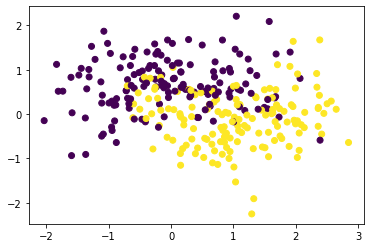

In [3]:
plt.scatter(data[:, 0], data[:, 1], c=label)

### 1.2 Resample Data

In [4]:
from imblearn.datasets import make_imbalance
from collections import Counter


def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}

data, label = make_imbalance(
    data,
    label,
    sampling_strategy=ratio_func,
    **{"multiplier": 0.1, "minority_class": 1,}
)

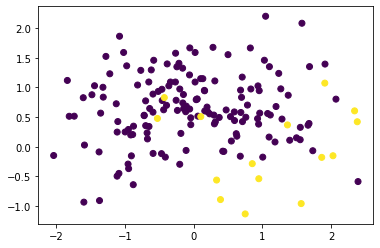

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=label)

### 1.3 Split

In [6]:
normal_data, abnormal_data = data[label==0], data[label==1]
normal_label, abnormal_label = label[label==0], label[label==1]

normal_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
abnormal_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

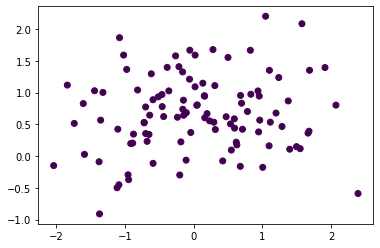

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_normal_data, train_label, test_normal_label = train_test_split(
    normal_data, normal_label, train_size=0.7, random_state=2021)

test_data = np.concatenate([test_normal_data, abnormal_data])
test_label = np.concatenate([test_normal_label, abnormal_label])

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label)

In [9]:
test_label.mean()

0.25

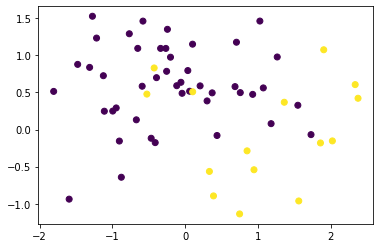

In [10]:
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label)

### 1.4 Visualization Data

In [11]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 2. Isolation Forest

In [12]:
from sklearn.ensemble import IsolationForest

isol_forest = IsolationForest()

### 2.1 Learning and Predict

In [13]:
isol_forest.fit(train_data, train_label)

IsolationForest()

In [14]:
isol_test_pred = isol_forest.predict(test_data)
isol_test_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1])

In [15]:
isol_forest.decision_function(test_data)

array([ 0.07920637,  0.01568211, -0.0007057 ,  0.02886496,  0.02354266,
        0.0608095 ,  0.07836153,  0.07959195,  0.0777155 ,  0.08368566,
        0.08096668,  0.01768742,  0.08804025, -0.00679535,  0.09107424,
       -0.07279372,  0.09572535, -0.0502307 ,  0.03196264,  0.0340732 ,
        0.03109257,  0.05498848,  0.01211572, -0.18090731,  0.01593877,
        0.00788293, -0.06141088,  0.05915229,  0.04951808,  0.0617401 ,
        0.08176808,  0.00573826,  0.05432684,  0.07215502, -0.00099358,
        0.06042053, -0.00692154, -0.03889864,  0.04679394,  0.05090291,
        0.07737391,  0.0739545 ,  0.05009019,  0.07951504,  0.00591456,
       -0.11496344,  0.06394809, -0.09365931, -0.06585884,  0.02217839,
       -0.11233681, -0.06277224, -0.17346579,  0.0744311 , -0.14945106,
       -0.13751562,  0.08314092, -0.11029918, -0.09093424, -0.11188274])

### 2.2 Evalution

In [16]:
# Accuracy
from sklearn.metrics import accuracy_score

isol_test_acc = accuracy_score(test_label, isol_test_pred == -1)
print(f"Isolation Forest Test Accuracy is {isol_test_acc:.4f}")   

Isolation Forest Test Accuracy is 0.7833


In [17]:
# F1-Score
from sklearn.metrics import f1_score

isol_test_f1 = f1_score(test_label, isol_test_pred == -1)
print(f"Isolation Forest Test F1-Score is {isol_test_f1:.4f}")   

Isolation Forest Test F1-Score is 0.6286


### 2.3 Visualization

In [18]:
isol_Z = isol_forest.predict(np.c_[xx.ravel(), yy.ravel()])
isol_Z = isol_Z.reshape(xx.shape)

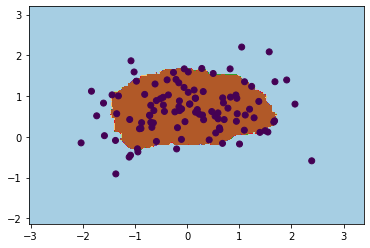

In [19]:
# Train
cs = plt.contourf(xx, yy, isol_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)

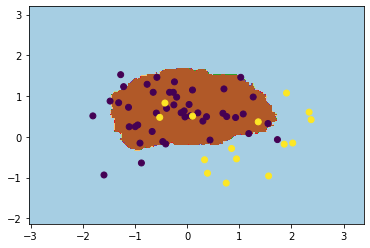

In [20]:
# Test
cs = plt.contourf(xx, yy, isol_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)

# 3. OCSVM

### 3.1 Learning And Predict

In [21]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM()
ocsvm.fit(train_data, train_label)

OneClassSVM()

In [22]:
ocsvm_test_pred = ocsvm.predict(test_data)
ocsvm_test_pred

array([ 1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1], dtype=int64)

### 3.2 Evalution

In [23]:
# Accuracy
ocsvm_test_acc = accuracy_score(test_label, ocsvm_test_pred == -1)
print(f"OCSVM Test Accuracy is {ocsvm_test_acc:.4f}")   

# F1-Score
ocsvm_test_f1 = f1_score(test_label, ocsvm_test_pred == -1)
print(f"OCSVM Test F1-Score is {ocsvm_test_f1:.4f}")   

OCSVM Test Accuracy is 0.5667
OCSVM Test F1-Score is 0.4800


### 3.3 Visualization

In [24]:
ocsvm_Z = ocsvm.predict(np.c_[xx.ravel(), yy.ravel()])
ocsvm_Z = ocsvm_Z.reshape(xx.shape)

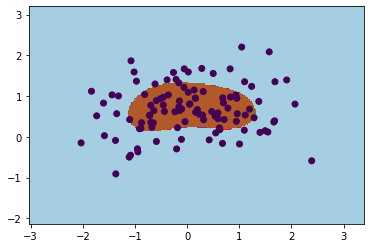

In [25]:
# Train
cs = plt.contourf(xx, yy, ocsvm_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)

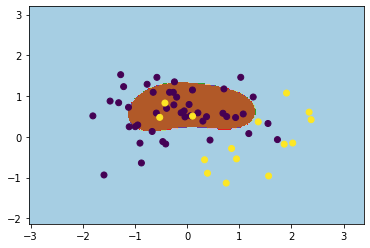

In [26]:
# Test
cs = plt.contourf(xx, yy, ocsvm_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)

# 4. PCA

### 4.1 Learning & Predict

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(train_data)

PCA(n_components=1)

In [28]:
test_latent = pca.transform(test_data)
test_latent[:10]

array([[ 2.96603448e-01],
       [ 1.24231267e+00],
       [ 1.06281107e+00],
       [-7.40403889e-01],
       [-1.04768362e+00],
       [ 1.06747491e-01],
       [ 2.14169771e-01],
       [-2.90818242e-01],
       [-6.48459113e-01],
       [-2.02332106e-04]])

In [29]:
test_recon = pca.inverse_transform(test_latent)
recon_diff = (test_data - test_recon) ** 2

test_data[0]

array([0.37198025, 0.49392302])

In [30]:
test_recon[0]

array([0.34662995, 0.7059456 ])

In [31]:
recon_diff[0]

array([0.00064264, 0.04495357])

In [32]:
pca_pred = recon_diff.mean(1)
pca_pred[:10]

array([2.27981061e-02, 1.27982521e-02, 2.23592395e-01, 2.53514995e-01,
       2.49587527e-01, 1.10212458e-01, 4.89886192e-02, 1.10896685e-02,
       5.78102995e-05, 7.73374114e-03])

### 4.2 Evalution

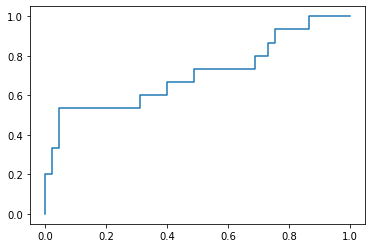

In [33]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(test_label, pca_pred)
pca_auroc = auc(fpr, tpr)
plt.plot(fpr, tpr)

In [34]:
print(f"PCA test AUROC is {pca_auroc:.4f}")   

PCA test AUROC is 0.7052


In [35]:
# Best Threshold
f1_scores = []

for t in threshold:
    pca_test_pred = pca_pred > t
    pca_test_f1 = f1_score(test_label, pca_test_pred)
    f1_scores += [pca_test_f1]
    
    print(f"threshold: {t:.4f}, f1-score: {pca_test_f1:.4f}")

threshold: 2.7621, f1-score: 0.0000
threshold: 1.7621, f1-score: 0.0000
threshold: 1.2702, f1-score: 0.2353
threshold: 0.9820, f1-score: 0.3333
threshold: 0.7935, f1-score: 0.4000
threshold: 0.7125, f1-score: 0.4762
threshold: 0.5471, f1-score: 0.5833
threshold: 0.2236, f1-score: 0.4444
threshold: 0.1373, f1-score: 0.4324
threshold: 0.1082, f1-score: 0.4390
threshold: 0.1044, f1-score: 0.4286
threshold: 0.0748, f1-score: 0.4348
threshold: 0.0567, f1-score: 0.4255
threshold: 0.0267, f1-score: 0.3929
threshold: 0.0229, f1-score: 0.3860
threshold: 0.0187, f1-score: 0.4068
threshold: 0.0163, f1-score: 0.4000
threshold: 0.0145, f1-score: 0.4262
threshold: 0.0140, f1-score: 0.4194
threshold: 0.0077, f1-score: 0.4179
threshold: 0.0076, f1-score: 0.4118
threshold: 0.0001, f1-score: 0.4054


In [36]:
best_thresh = threshold[np.argmax(f1_scores)]
best_thresh

0.5471488977187242

In [37]:
pca_test_pred = pca_pred > best_thresh
pca_test_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True, False, False,  True,  True])

In [38]:
pca_test_acc = accuracy_score(test_label, pca_test_pred)
print(f"PCA Test Accuracy is {pca_test_acc:.4f}")   

pca_test_f1 = f1_score(test_label, pca_test_pred)
print(f"PCA Test F1-Score is {pca_test_f1:.4f}")   

PCA Test Accuracy is 0.8333
PCA Test F1-Score is 0.5833


### 4.3 Visualization

In [39]:
Z = np.c_[xx.ravel(), yy.ravel()]

Z_latent = pca.transform(Z)
Z_recon = pca.inverse_transform(Z_latent)

pca_Z = (Z - Z_recon).mean(1)

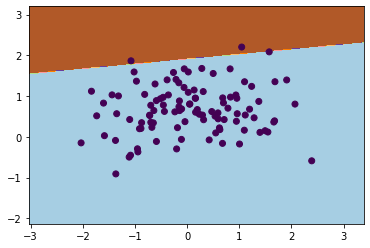

In [40]:
# Train
pca_Z = list(map(int, pca_Z > best_thresh))
pca_Z = np.array(pca_Z).reshape(xx.shape)

cs = plt.contourf(xx, yy, pca_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)

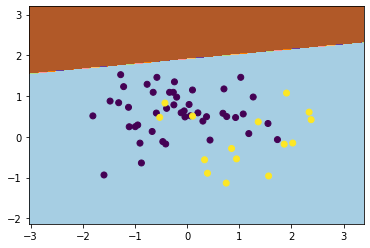

In [41]:
# Test
cs = plt.contourf(xx, yy, pca_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)

# 5. Summary

In [42]:
# Accuracy
print(f"Isolation Forest Test Accuracy is {isol_test_acc:.4f}")
print(f"OCSVM Test Accuracy is {ocsvm_test_acc:.4f}")
print(f"PCA Test Accuracy is {pca_test_acc:.4f}")

Isolation Forest Test Accuracy is 0.7833
OCSVM Test Accuracy is 0.5667
PCA Test Accuracy is 0.8333


In [43]:
# F1-Score
print(f"Isolation Forest Test F1-Score is {isol_test_f1:.4f}")
print(f"OCSVM Test F1-Score is {ocsvm_test_f1:.4f}")
print(f"PCA Test F1-Score is {pca_test_f1:.4f}")

Isolation Forest Test F1-Score is 0.6286
OCSVM Test F1-Score is 0.4800
PCA Test F1-Score is 0.5833
